### - 분석 과제

월별 출생 수 분석 (1), (2)에서 알게된 정보를 바탕으로 출생과 관련된 요인으로 월별 평균온도, 혼인신고 데이터를 받아 임신을 한 시점에 맞춰 연관성이 있는지 연관성 분석을 진행하겠다.

### - 데이터

In [1]:
## import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager,rc
import matplotlib

#### 1. 한국 월별 출생 수 (2015~2019년도)

In [2]:
## update Data
df = pd.read_csv("C:\\Users\\USER\\Desktop\\Data\\birth_date\\birth_month_korea.csv")

df.head(10)

,Country or Area,Year,Month,Value
0,Republic of Korea,2019,Total,302676
1,Republic of Korea,2019,January,30271
2,Republic of Korea,2019,February,25710
3,Republic of Korea,2019,March,27049
4,Republic of Korea,2019,April,26104
5,Republic of Korea,2019,May,25299
6,Republic of Korea,2019,June,23992
7,Republic of Korea,2019,July,25222
8,Republic of Korea,2019,August,24371
9,Republic of Korea,2019,September,24090


In [3]:
## Total 제외
df = df[~df['Month'].isin(['Total'])]

## 출산의 달 원인을 알기위한 분석이므로 임신한 달에 맞춰 변경
df['Month'] = df['Month'].map({'January':'4월',
                                'February':'5월',
                                'March':'6월',
                                'April':'7월',
                                'May':'8월',
                                'June':'9월',
                                'July':'10월',
                                'August':'11월',
                                'September':'12월',
                                'October':'1월',
                                'November':'2월',
                                'December':'3월'})

In [4]:
df = df[['Year','Month','Value']]

df.head(10)

,Year,Month,Value
1,2019,4월,30271
2,2019,5월,25710
3,2019,6월,27049
4,2019,7월,26104
5,2019,8월,25299
6,2019,9월,23992
7,2019,10월,25222
8,2019,11월,24371
9,2019,12월,24090
10,2019,1월,25613


#### 2. 월별 평균 온도 (2015~2019)

In [5]:
### 월별 평균 온도 추가하기
temper_df = pd.read_csv("C:\\Users\\USER\\Desktop\\Data\\birth_date\\korea_temperature.csv", encoding='cp949')

## 년도와 월을 kor_df에 맞게 변경하기
temper_df['Year'] = temper_df['년월'].str[-2:].astype('object')
temper_df['Year'] = '20' + temper_df['Year']
temper_df['Year'].astype('int')

# 월
temper_df['Month'] = temper_df['년월'].str[:3]
temper_df['Month'] = temper_df['Month'].map({'Jan':'1월',
                                            'Feb':'2월',
                                            'Mar':'3월',
                                            'Apr':'4월',
                                            'May':'5월',
                                            'Jun':'6월',
                                            'Jul':'7월',
                                            'Aug':'8월',
                                            'Sep':'9월',
                                            'Oct':'10월',
                                            'Nov':'11월',
                                            'Dec':'12월'})

temper_df.columns = ['Date','Mean_Temperature','Year','Month']

temper_df = temper_df[['Year','Month','Mean_Temperature']]
temper_df.head(10)

,Year,Month,Mean_Temperature
0,2015,1월,-0.9
1,2015,2월,1.0
2,2015,3월,6.3
3,2015,4월,13.3
4,2015,5월,18.9
5,2015,6월,23.6
6,2015,7월,25.8
7,2015,8월,26.3
8,2015,9월,22.4
9,2015,10월,15.5


In [6]:
temper_df['Year'] = temper_df['Year'].astype('int')

temper_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              60 non-null     int32  
 1   Month             60 non-null     object 
 2   Mean_Temperature  60 non-null     float64
dtypes: float64(1), int32(1), object(1)
memory usage: 1.3+ KB


#### 3. 혼인신고 데이터

In [7]:
## 혼인신고 data
df_marriage = pd.read_csv("C:\\Users\\USER\\Desktop\\Data\\marriage_registration.csv", encoding='cp949', header=None)

df_marriage

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,행정구역별(1),2015. 01,2015. 02,2015. 03,2015. 04,2015. 05,2015. 06,2015. 07,2015. 08,2015. 09,...,2019. 03,2019. 04,2019. 05,2019. 06,2019. 07,2019. 08,2019. 09,2019. 10,2019. 11,2019. 12
1,행정구역별(1),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),...,혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건),혼인건수(건)
2,전국,28396,20912,27197,24669,27946,26737,23571,21821,19001,...,19549,20026,23045,17942,19178,18336,15798,20327,20488,24945


In [8]:
marriage = df_marriage.T

marriage

# 불필요한 요소 삭제
marriage = marriage[1:]
marriage.columns = ['Date','Marriage_Count','Marriage_Value']
marriage.drop(['Marriage_Count'], axis=1, inplace=True)

marriage['Year'] = marriage['Date'].str[0:4]
marriage['Month'] = marriage['Date'].str[-2:]

# Month를 영어 달로 변경
marriage['Month'] = marriage['Month'].map({'01':'1월',
                                  '02':'2월',
                                  '03':'3월',
                                  '04':'4월',
                                  '05':'5월',
                                  '06':'6월',
                                  '07':'7월',
                                  '08':'8월',
                                  '09':'9월',
                                  '10':'10월',
                                  '11':'11월',
                                  '12':'12월'})

In [9]:
marriage = marriage[['Year','Month','Marriage_Value']]

marriage[['Year','Marriage_Value']] = marriage[['Year','Marriage_Value']].astype('int')

In [10]:
## merge data 
merge_df = pd.merge(df, temper_df, on=['Year','Month'], how='inner')
merge_df = pd.merge(merge_df, marriage, on=['Year','Month'], how='inner')

merge_df.head(10)

,Year,Month,Value,Mean_Temperature,Marriage_Value
0,2019,4월,30271,12.1,20026
1,2019,5월,25710,19.4,23045
2,2019,6월,27049,22.5,17942
3,2019,7월,26104,25.9,19178
4,2019,8월,25299,27.2,18336
5,2019,9월,23992,22.6,15798
6,2019,10월,25222,16.4,20327
7,2019,11월,24371,7.6,20488
8,2019,12월,24090,1.4,24945
9,2019,1월,25613,-0.9,21326


### - 회귀 분석

이번 분석을 통해 임신한 달과 관련성이 있다고 생각하는 요인 온도, 혼인건수 2개의 요인이 얼마나 설명력을 갖고 있는 지 살펴보자

그 전에 plot을 통해 상관성이 있는지 확인해보자

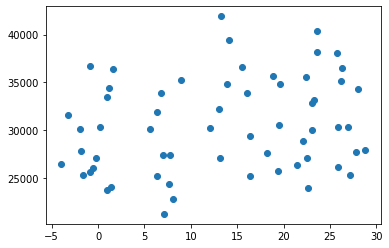

In [11]:
plt.scatter(merge_df['Mean_Temperature'],merge_df['Value'])

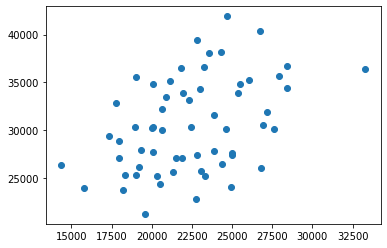

In [12]:
plt.scatter(merge_df['Marriage_Value'],merge_df['Value'])

In [13]:
corr = merge_df.corr(method='pearson')

corr

,Year,Value,Mean_Temperature,Marriage_Value
Year,1.000000,-0.851513,-0.009562,-0.506949
Value,-0.851513,1.000000,0.222716,0.422536
Mean_Temperature,-0.009562,0.222716,1.000000,-0.412037
Marriage_Value,-0.506949,0.422536,-0.412037,1.000000


In [14]:
import statsmodels.api as sm
 
model = sm.OLS.from_formula("Value ~ Mean_Temperature+Marriage_Value", data = merge_df)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Value   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     16.61
Date:                Mon, 10 Jan 2022   Prob (F-statistic):           2.07e-06
Time:                        23:11:17   Log-Likelihood:                -580.65
No. Observations:                  60   AIC:                             1167.
Df Residuals:                      57   BIC:                             1174.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         8332.9564   3967.840  

### - 결론

위 그림에서 동그라미를 친 부분을 통해 아래와 같은 결론을 얻을 수 있다.

1. 위 2가지 요소는 월별 임신한 수에 대한 34% 정도의 설명력을 가진다.

2. 각 요소의 통계적 유의성은 p-value 0.05 이하에서 유의하다고 볼 수 있다.

3. 위를 아래와 같은 식으로 나타낼 수 있다. 

월별 임신한 수 = 8332.9 + 226.9 * 평균 온도 + 0.85 * 혼인건수 